In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import yfinance as yf

plt.style.use("seaborn-v0_8")

In [114]:
tickers = ["NIFTYBEES.NS","BANKBEES.NS", "QQQ", "IVV"]

In [115]:
data = yf.download(tickers, start="2015-01-01")


/var/folders/26/fp51yn8x1931k3nqw5sz13lh0000gn/T/ipykernel_44177/2895278447.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2015-01-01")
[*********************100%***********************]  4 of 4 completed


In [116]:
raw = yf.download(tickers, start="2024-01-01")

if ("Close" in raw.columns.get_level_values(0)):
    data = raw.xs("Close", axis=1, level=0)
else:
    raise ValueError("No usable price data found. Available columns:", raw.columns)

data = data.dropna()
print(data.head())

/var/folders/26/fp51yn8x1931k3nqw5sz13lh0000gn/T/ipykernel_44177/332627055.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  raw = yf.download(tickers, start="2024-01-01")
[*********************100%***********************]  4 of 4 completed

Ticker      BANKBEES.NS         IVV  NIFTYBEES.NS         QQQ
Date                                                         
2024-01-02   487.140015  464.186707    239.210007  398.705200
2024-01-03   486.170013  460.394135    237.740005  394.486328
2024-01-04   491.239990  458.976868    239.300003  392.456116
2024-01-05   490.649994  459.524231    239.740005  392.921570
2024-01-08   483.910004  465.848358    237.679993  401.042450


In [117]:
daily_returns = data.pct_change().dropna()
cumulative_returns = (1 + daily_returns).cumprod()

In [118]:
trading_days = 252

annual_returns = daily_returns.mean() * trading_days
annual_volatility = daily_returns.std() * np.sqrt(trading_days)
sharpe_ratio = annual_returns / annual_volatility

In [119]:
running_max = cumulative_returns.cummax()
drawdown = (cumulative_returns/running_max) - 1
max_drawdown = drawdown.min()

In [120]:
summary = pd.DataFrame({
    "Annual Return (%)": annual_returns * 100,
    "Annual Volatility (%)": annual_volatility * 100,
    "Sharpe Ratio": sharpe_ratio,
    "Max Drawdown (%)": max_drawdown * 100
})


In [121]:
print("\n                         ETF Risk & Return Summary             \n")
print(summary.round(2))


                         ETF Risk & Return Summary             

              Annual Return (%)  Annual Volatility (%)  Sharpe Ratio  \
Ticker                                                                 
BANKBEES.NS              -51.97                  19.50         -2.66   
IVV                       30.73                  11.70          2.63   
NIFTYBEES.NS               7.31                  15.79          0.46   
QQQ                       50.36                  15.80          3.19   

              Max Drawdown (%)  
Ticker                          
BANKBEES.NS              -6.87  
IVV                      -1.72  
NIFTYBEES.NS             -3.44  
QQQ                      -2.61  


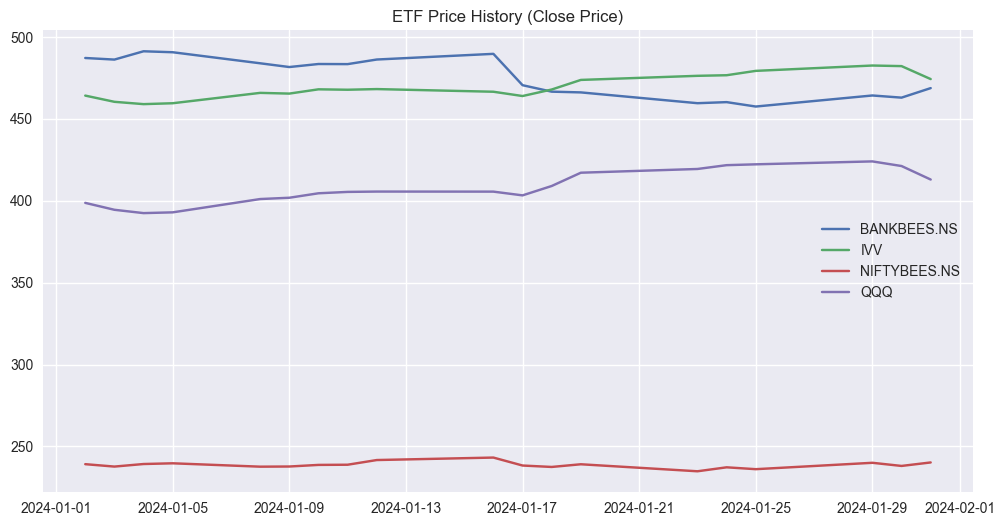

In [122]:
plt.figure(figsize=(12, 6))
for col in data.columns:
    plt.plot(data[col], label=col)
plt.title("ETF Price History (Close Price)")
plt.legend()
plt.show()

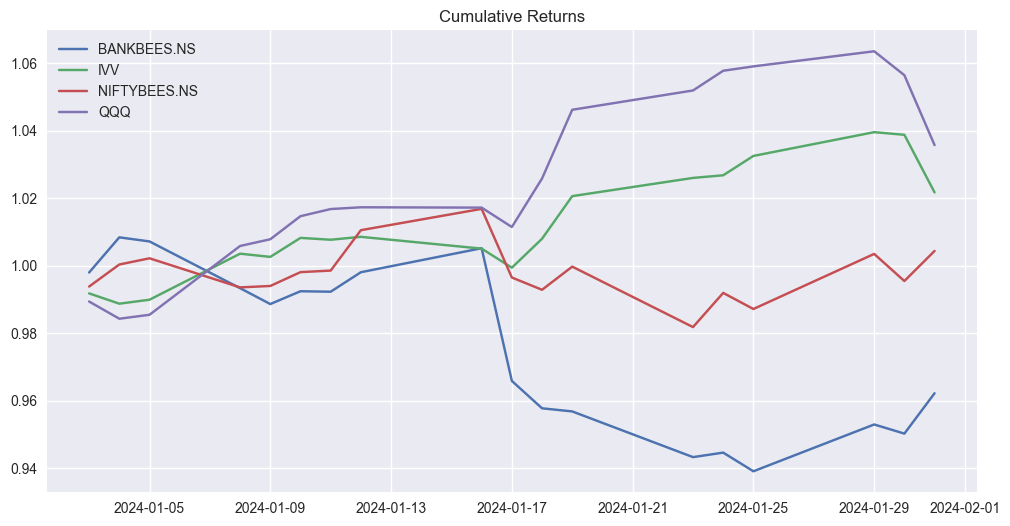

In [123]:
plt.figure(figsize=(12, 6))
for col in cumulative_returns.columns:
    plt.plot(cumulative_returns[col], label=col)
plt.title("Cumulative Returns")
plt.legend()
plt.show()

/var/folders/26/fp51yn8x1931k3nqw5sz13lh0000gn/T/ipykernel_44177/3814395258.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (annual_volatility[i], annual_returns[i]))


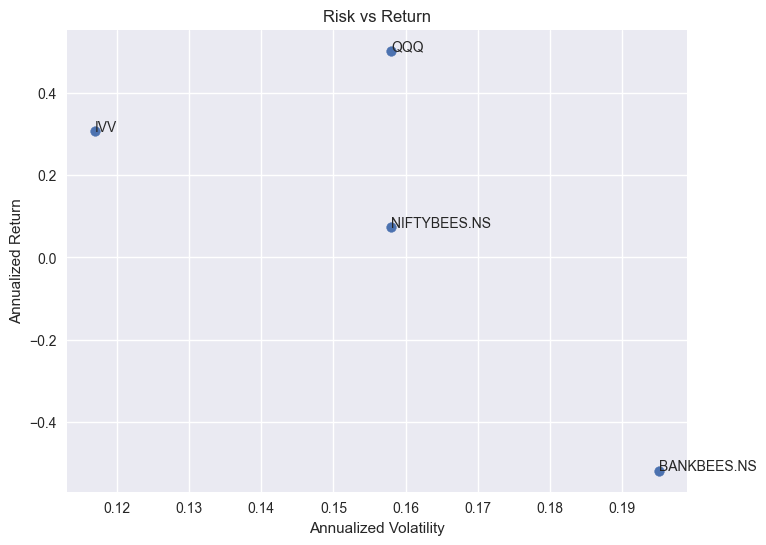

In [124]:
plt.figure(figsize= (8, 6))
plt.scatter(annual_volatility, annual_returns)
for i, txt in enumerate(annual_returns.index):
    plt.annotate(txt, (annual_volatility[i], annual_returns[i]))

plt.xlabel("Annualized Volatility")
plt.ylabel("Annualized Return")
plt.title("Risk vs Return")
plt.grid(True)
plt.show()

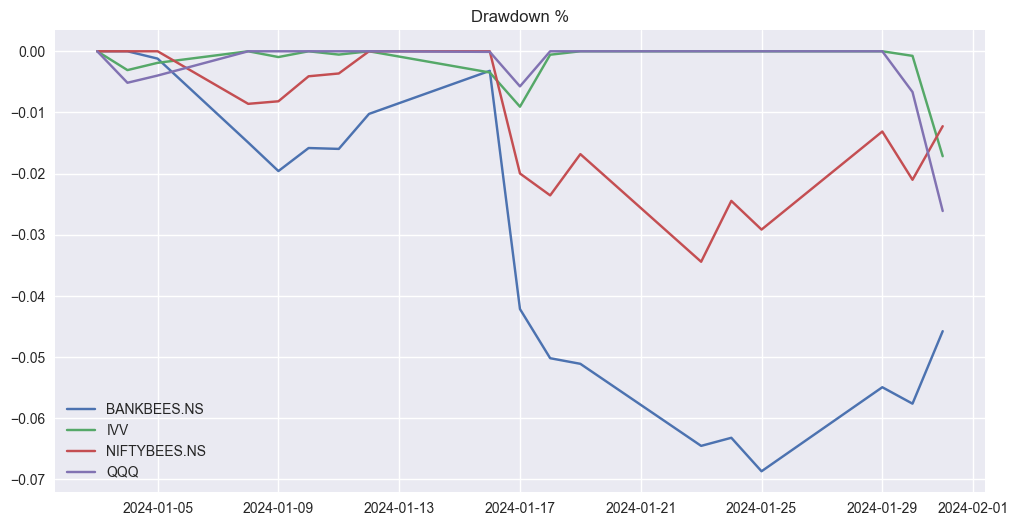

In [125]:
plt.figure(figsize=(12, 6))
for col in drawdown.columns:
    plt.plot(drawdown[col], label = col)
plt.title("Drawdown %")
plt.legend()
plt.show()